<a href="https://colab.research.google.com/github/PeeranatK/ML-university-year4/blob/main/Lab4_Polynomial_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#df=pd.read_csv('..\data\house_data_fs.csv', index_col = 0)
df=pd.read_csv('house_data_fs.csv', index_col = 0)
#df=pd.read_csv('test_data.csv', index_col = 0)
df = df.dropna()
df1 = df.head(21613)

### Linear regression model using a single feature

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

#Y_pred1 = model.predict(X_scaled)
#rscore1 = model.score(X_scaled, y)
#mse1 = mean_squared_error(y, Y_pred1)
#mae1 = mean_absolute_error(y, Y_pred1)

#print('r2-score:', rscore1.round(2), '\nmean squared error:', mse1.round(2), '\nmean absolute error:', mae1.round(2))

### Visualization for Linear Regression model

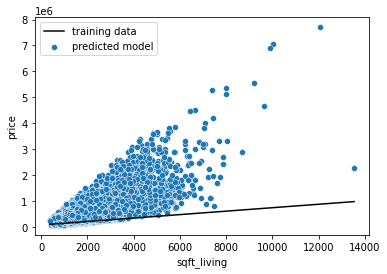

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features
2) model using a linear regression.
3) Predict using the Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation
#order = 5
order = 20
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling.
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('r2-score:', rscore.round(2), '\nmean squared error:', mse.round(2), '\nmean absolute error:', mae.round(2))




[ 1.68428499e-05 -4.72236345e-03  1.72264571e-04  7.13709397e-04
  2.47832514e-03  8.29336440e-03  2.65802828e-02  7.98290667e-02
  2.18914909e-01  5.25083237e-01  1.02176957e+00  1.35844308e+00
  5.51252966e-01 -1.27414536e+00  5.82137030e-01 -1.30474121e-01
  1.66667146e-02 -1.23920876e-03  5.00739889e-05 -8.51642686e-07] 525660.9118400065
r2-score: 0.21 
mean squared error: 107071546892.73 
mean absolute error: 221980.47


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#ignore warning
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#



X = df1['sqft_living'].values
y = df1['price'].values

X = X.reshape(-1,1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3,shuffle = False)

steps = [("imp_mean",SimpleImputer()),("scaler",StandardScaler()),("transform",PolynomialFeatures(degree = 6)),("liReg",LinearRegression())]
#steps = [("imp_mean",SimpleImputer()),("scaler",StandardScaler()),("transform",PolynomialFeatures(degree = 6)),("lassoReg",Lasso(alpha=100,max_iter=20000,normalize=True))]
#steps = [("imp_mean",SimpleImputer()),("scaler",StandardScaler()),("transform",PolynomialFeatures(degree = 6)),("lassoReg",Ridge(alpha=100,normalize=True))]


pipeline = Pipeline(steps)

#X_train = X_train.reshape(-1,1)



pipeline.fit(X_train,y_train)
rscore1 = pipeline.score(X_test,y_test)
rscore2 = pipeline.score(X_train,y_train)

y_pred = pipeline.predict(X_test)

#linear
print('\nLinear\nr2-score1:', rscore1.round(2),'r2-score2:', rscore2.round(2))



#Lasso
X = df1['sqft_living'].values
y = df1['price'].values

X = X.reshape(-1,1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3,shuffle = False)
steps = [("imp_mean",SimpleImputer()),("scaler",StandardScaler()),("transform",PolynomialFeatures(degree = 6)),("lassoReg",Lasso(alpha=100,max_iter=20000,normalize=True))]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
rscore1 = pipeline.score(X_test,y_test)
rscore2 = pipeline.score(X_train,y_train)
y_pred = pipeline.predict(X_test)
print('\nLasso\nr2-score1:', rscore1.round(2),'r2-score2:', rscore2.round(2))

#Ridge
X = df1['sqft_living'].values
y = df1['price'].values
X = X.reshape(-1,1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3,shuffle = False)
steps = [("imp_mean",SimpleImputer()),("scaler",StandardScaler()),("transform",PolynomialFeatures(degree = 6)),("lassoReg",Ridge(alpha=100,normalize=True))]
pipeline = Pipeline(steps)

pipeline.fit(X_train,y_train)
rscore1 = pipeline.score(X_test,y_test)
rscore2 = pipeline.score(X_train,y_train)

y_pred = pipeline.predict(X_test)

print('\nRidge\nr2-score1:', rscore1.round(2),'r2-score2:', rscore2.round(2))


Linear
r2-score1: 0.53 r2-score2: 0.56

Lasso
r2-score1: 0.52 r2-score2: 0.55

Ridge
r2-score1: 0.01 r2-score2: 0.02


### Visualization for Poly regression

In [ ]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

### Saving Best Model for Deployment

In [ ]:
import joblib
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

best_order = 20

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

#Y_pred = model.predict(poly_features)
#rscore = model.score(poly_features, y)
#mse = mean_squared_error(y, Y_pred)
#mae = mean_absolute_error(y, Y_pred)

#print('r2-score:', rscore.round(2), '\nmean squared error:', mse.round(2), '\nmean absolute error:', mae.round(2))


import joblib
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)